# Candidate independent loci from APOE $\epsilon$2 and APOE $\epsilon$4

Date: Nov 18, 2025

To examine whether there are potentially independent xQTLs in the APOE TAD region (chr19:41840000-47960000) that are independent of two well-known AD risk loci, APOE $\epsilon$2 and APOE $\epsilon$4, we performed a diagnostic approach using imputation of GWAS summary statistics.
- For each independent cis-xQTL set, we used a leave-one-set-out imputation strategy. We first removed the summary statistics for variants in each set from all 6 AD GWAS summary statistics, then applied the RAISS imputation method to impute marginal association z-scores for each set and each AD GWAS.
- Analysis scope: In this analysis, we focused on the association region (chr19:42346101-46842901), which represents within the broader APOE TAD. All xQTLs within this association region were included in our independence assessment to ensure comprehensive coverage of potentially causal regulatory variants.

**Related files (input)**

- Independent sets after merging (from notebook 2_Define_independent_sets.ipynb): `xqtl_only_APOE_all_cohorts_merged_cos_cs_after_between_purity.rds`


**Analysis streamline**

1. *Code for reproducing the imputation analysis*: This section provides the computational framework and implementation details for the leave-one-set-out imputation strategy, including data preprocessing steps, RAISS parameter settings, and quality control measures applied to ensure robust imputation results.
2. *Candidate independent AD risk loci in cis-xQTL*: This section examines 415 independent cis-xQTL sets within the association region, evaluating their potential independence from APOE $\epsilon$2 and APOE $\epsilon$4 through comparison of observed versus imputed z-scores across the 6 AD GWAS datasets.


**Related files (results)**

- Imputation results: `xqtl_only_APOE_all_cohorts_imputation_results.rds`

## 1. Code for reproducing the imputation analysis

The code for performing the leave-one-CoS-out imputation strategy can be found in `APOE_Rcode.R`. The code is used for each GWAS and each CoS at one time. Code contains the following steps:
1. Load GWAS sumstat (`load_rss_data`) and LD matrix from APOE combined LD block region (`load_LD_matrix`).
2. Preprocess the input data (`rss_basic_qc`) with the transformation of Inf z-score as the max value - reproducing Alexandre previous code.
3. Perform Slalom quality control (`slalom(zScore = z, LD_mat = LD_mat,r2_threshold=0.2)`)
4. Index the variants in the specific CoS then drop those variants from sumstats.
5. Perform RAISS imputation for the droped sumstats (`raiss`).

## 2. Candidate independent AD risk loci in cis-xQTL

- For 6 AD GWAS GWAS, we obtained 1830 - 1943 variants with valid imputation results, respectively (`RAISS_imputation_results_summary_cis_only.rds`). This summary results including variant names, the observed z-score, the imputed z-score, index of the independent CoS, the merged colocalization outcomes names, and the results file name you obtained after running section 1.
- Check all imputation results and we do see some independence sets were not correctly imputed (**section2.1**).
- Trying to reproduce the variants `rs5167` reported previously in Kellis fine-mapped CS3 and `rs2288911`in CS4. But based on the leave-one-CoS-out imputation strategy, we did not see much difference between the observed z-score and imputed z-score by using a larger impuation analysis regions (**section 2.2**). But there are some variants within the same set (`ind_cos_27`) showing different observed z-score and imputaed z-score 4 AD GWAS excluded two Bellenguez GWAS. (**section 2.3** and **section2.6**).
- Discovery the potential AD risk loci in cis-xQTL using a distance-based statistics.
  - Selection criteria: BH adjusted p-values of variants in CoS < 0.05.
  - There are 6-18 independence sets with BH FDR < 0.05, where several sets are duplicated from multiple AD GWAS (Upset plot from **section 2.4**).
  - There are 2-12 independence sets with BH FDR < 0.05 after removing sQTL only signals (**section 2.5**).
 

**Some interested sets (section 2.6)**
  - **Independence set (145)**: only identified by `'DLPFC_Klein_gpQTL_unadjusted_gp_0860_O96005_ENSG00000104853'` has significantly difference imputed z-score and observed z-score in 5 AD GWAS cohorts (excluded only AD Bellenguez).
  - **Independence set (27)**: please check in **section 2.3** - Alexandra previous findings.
  - **Independence set (26)**: identified by *APOC1* in contexts - `AC_DeJager_eQTL_ENSG00000130208; Metabrain_Cortex_chr19_41840000_47960000_ENSG00000130208; STARNET_eQTL_Mac_ENSG00000130208; ROSMAP_AC_ENSG00000130208; ROSMAP_DLPFC_ENSG00000130208` showing in 3 AD GWAS - AD_Kunkle_Stage1_2019; AD_Wightman_Full_2021; AD_Wightman_Excluding23andMe_2021.
  - **List of genes**: 'GMFG''PSG9''ZNF575''PINLYP''KCNN4''ZNF226''BCAM''NECTIN2''TOMM40''APOE''APOC1''APOC4''APOC4-APOC2''APOC2''CLPTM1''ZNF296''BLOC1S3''PPP5D1''ARHGAP35''CCDC9'

In [2]:
library(tidyverse)
raiss_summary <- readRDS("xqtl_only_APOE_all_cohorts_imputation_results.rds")
sapply(raiss_summary, nrow) %>% as.data.frame

,.
,<int>
AD_Bellenguez,3515
AD_Kunkle_Stage1_2019,3576
AD_Wightman_Full_2021,3486
AD_Wightman_Excluding23andMe_2021,3459
AD_Wightman_ExcludingUKBand23andME_2021,3457
AD_Bellenguez_EADB,3535


In [4]:
raiss_summary[[1]] %>% head(n=2)

,variant_id,z_observed,z_imputed,z_qced,cos_idx
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,19:42360920:C:T,-0.66088632,-0.9179411,-0.66088632,rss_qc_imputed_AD_Bellenguez_indcos_1.rds
2,19:42392812:T:C,-0.08768657,-0.6833007,-0.08768657,rss_qc_imputed_AD_Bellenguez_indcos_1.rds


### 2.1 Visualization of the imputation results for all AD GWAS

Warning message:
“Removed 40 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 39 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 56 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 53 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 56 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 40 rows containing missing values or values outside the scale range
(`geom_point()`).”


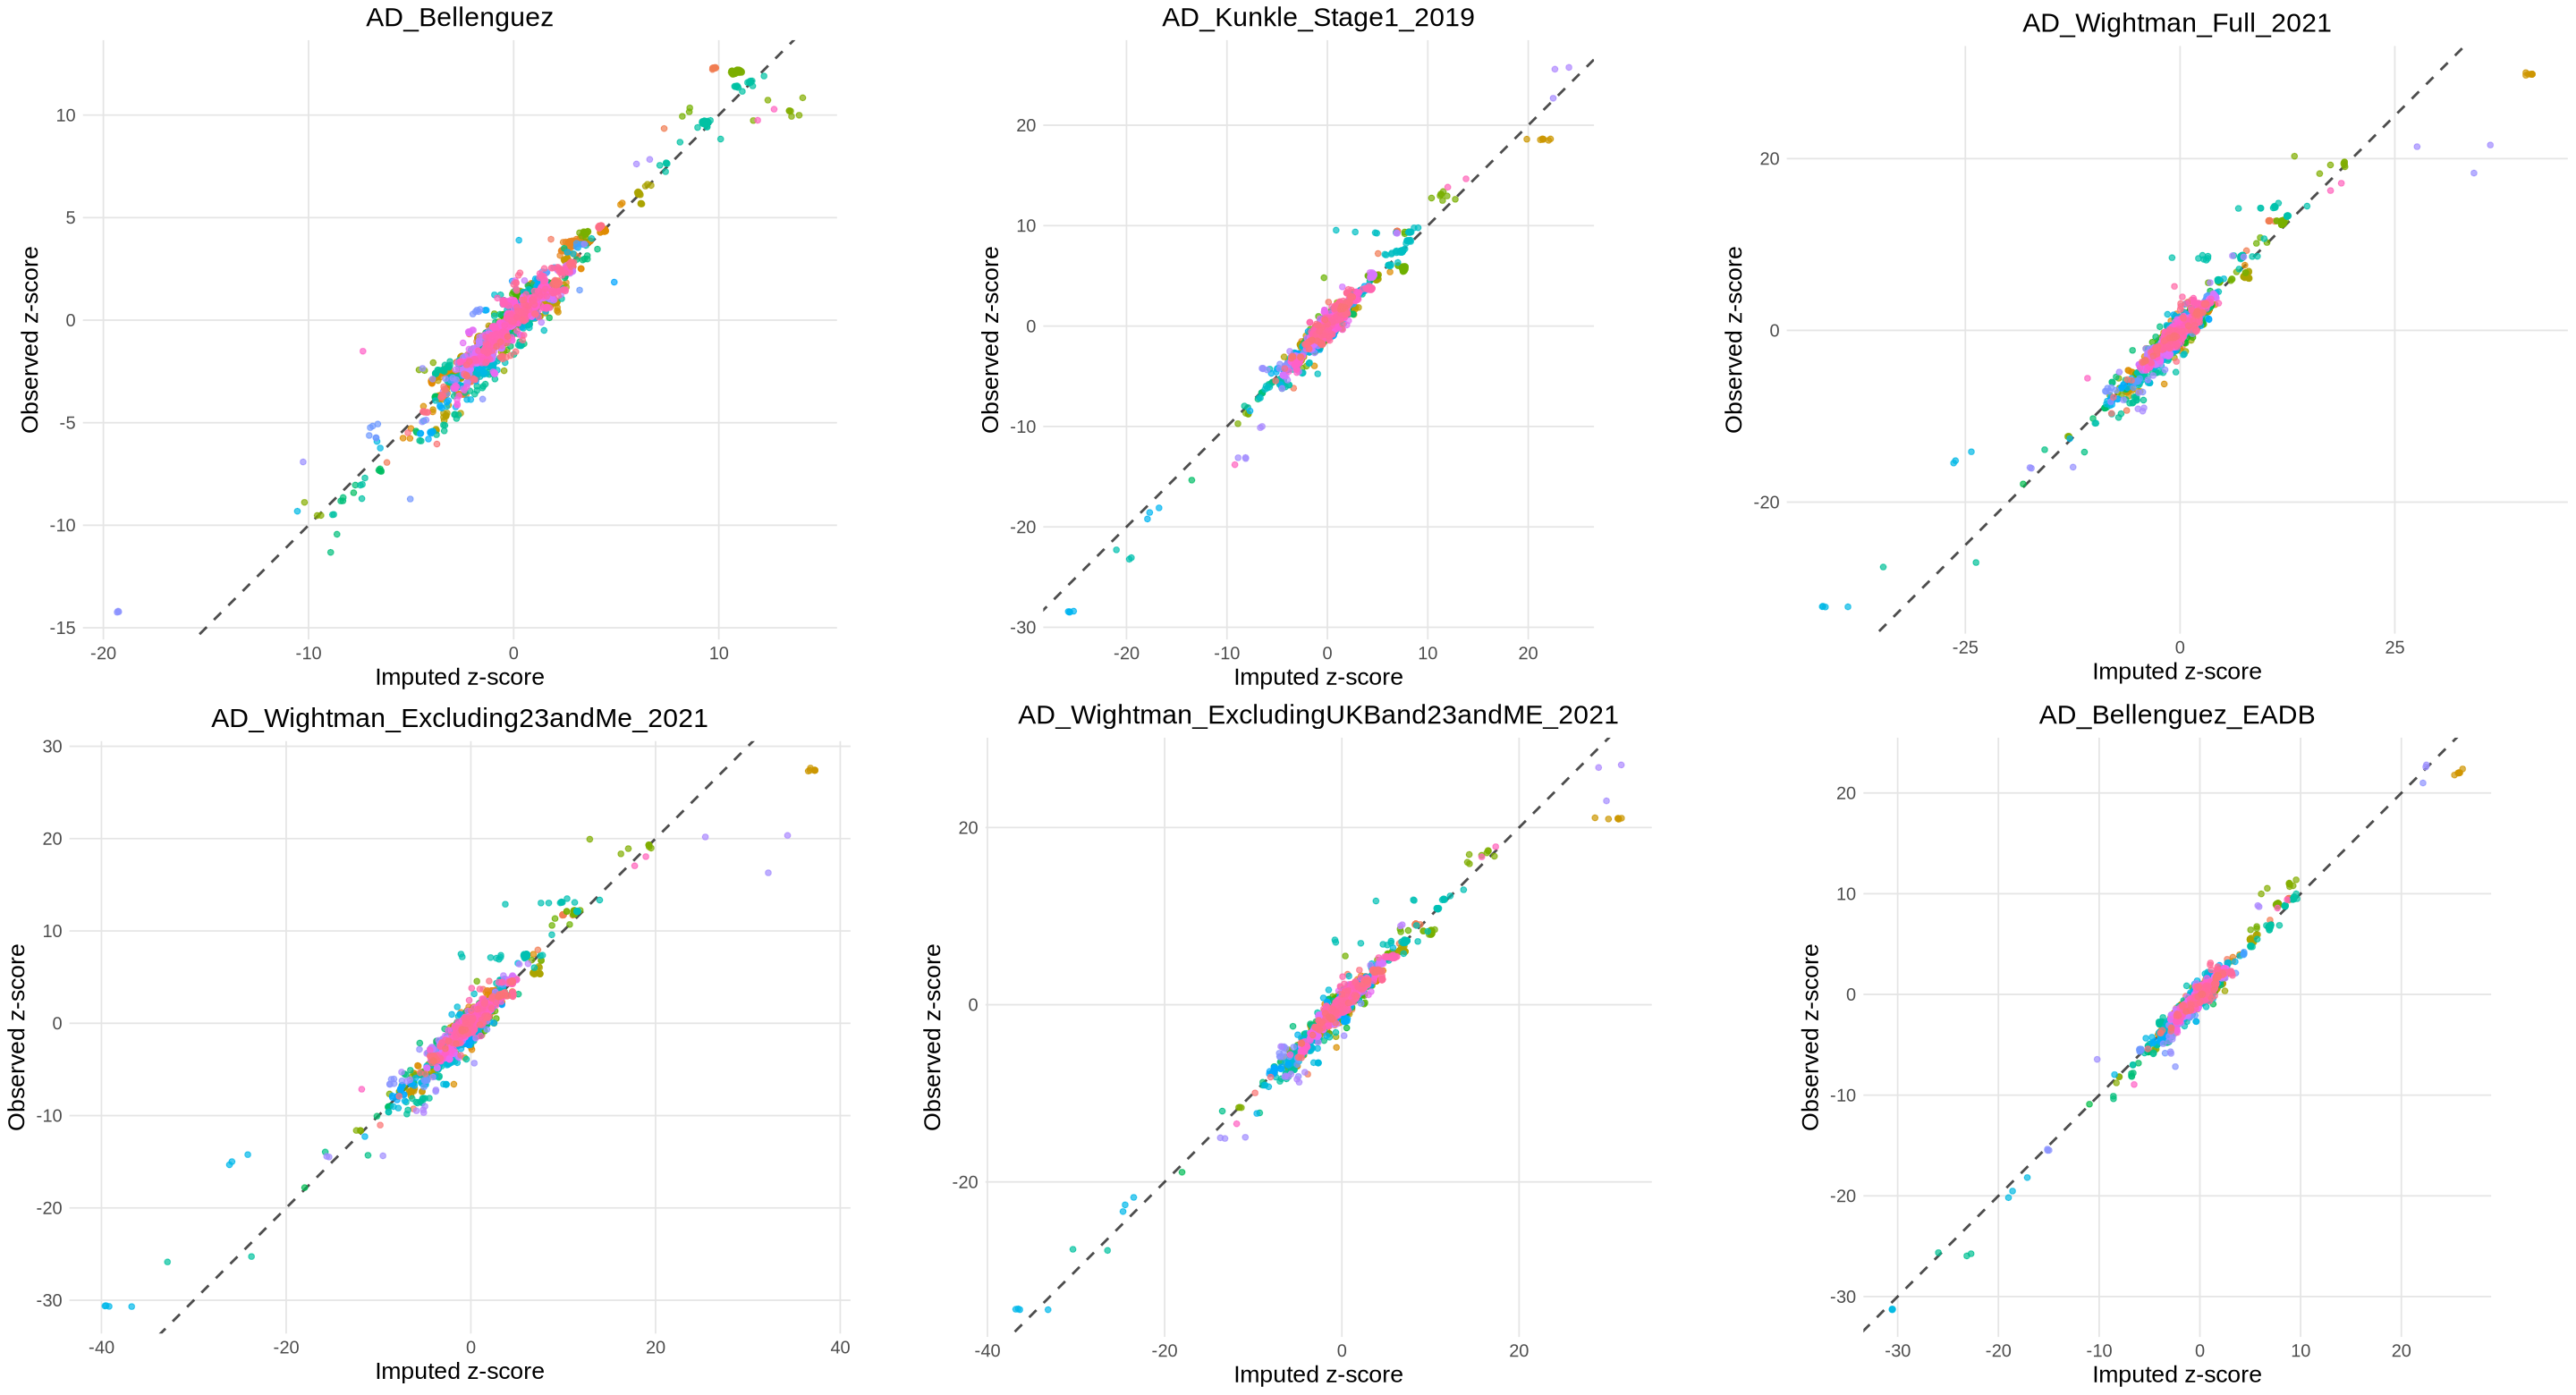

In [11]:
library(ggplot2)
library(gridExtra)
options(repr.plot.width = 24, repr.plot.height = 13)

# Create individual plots
plot_list <- list()

for(i in 1:6) {
  plot_list[[i]] <- ggplot(raiss_summary[[i]], aes(x = z_observed, y = z_imputed)) +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", 
                color = "black", alpha = 0.7, linewidth = 0.8) +
    geom_point(aes(color = cos_idx), alpha = 0.7, size = 1.5) +
    labs(
      y = "Observed z-score",
      x = "Imputed z-score",
      color = "COS",
      title = names(raiss_summary)[i]
    ) +
    theme_minimal() +
    theme(
      legend.position = "none",
      text = element_text(size = 14),
      axis.title = element_text(size = 16),
      axis.text = element_text(size = 12),
      plot.title = element_text(size = 18, hjust = 0.5),
      panel.grid.minor = element_blank(),
      panel.grid.major = element_line(color = "grey90")  # Fixed: removed alpha, used color instead
    ) +
    coord_equal()
}

# Arrange in 3 rows x 2 columns
grid.arrange(grobs = plot_list, nrow = 2, ncol = 3)

### 2.2 Check previous variant `rs5167` in Kellis fine-mapped CS3 and `rs2288911` in CS4.

In [21]:
lapply(raiss_summary, function(ss){
    ss %>% filter(grepl("19:44945208", variant_id))
}) %>%
  do.call(rbind, .) %>%
  as.data.frame()

,variant_id,z_observed,z_imputed,z_qced,cos_idx
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
AD_Bellenguez,19:44945208:T:G,11.146067,11.152670,11.146067,rss_qc_imputed_AD_Bellenguez_indcos_27.rds
AD_Kunkle_Stage1_2019,19:44945208:T:G,8.630872,9.781674,8.630872,rss_qc_imputed_AD_Kunkle_Stage1_2019_indcos_27.rds
AD_Wightman_Full_2021,19:44945208:T:G,14.784678,14.465055,14.784678,rss_qc_imputed_AD_Wightman_Full_2021_indcos_27.rds
AD_Wightman_Excluding23andMe_2021,19:44945208:T:G,13.948344,13.348266,13.948344,rss_qc_imputed_AD_Wightman_Excluding23andMe_2021_indcos_27.rds
AD_Wightman_ExcludingUKBand23andME_2021,19:44945208:T:G,13.740385,12.973411,13.740385,rss_qc_imputed_AD_Wightman_ExcludingUKBand23andME_2021_indcos_27.rds
AD_Bellenguez_EADB,19:44945208:T:G,9.652020,9.497849,9.652020,rss_qc_imputed_AD_Bellenguez_EADB_indcos_27.rds


In [20]:
lapply(raiss_summary, function(ss){
    ss %>% filter(grepl("19:44946027", variant_id))
}) %>%
  do.call(rbind, .) %>%
  as.data.frame()

,variant_id,z_observed,z_imputed,z_qced,cos_idx
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
AD_Bellenguez,19:44946027:T:G,7.125000,7.549648,7.125000,rss_qc_imputed_AD_Bellenguez_indcos_27.rds
AD_Kunkle_Stage1_2019,19:44946027:T:G,6.191781,6.083135,6.191781,rss_qc_imputed_AD_Kunkle_Stage1_2019_indcos_27.rds
AD_Wightman_Full_2021,19:44946027:T:G,4.366113,5.888452,4.366113,rss_qc_imputed_AD_Wightman_Full_2021_indcos_27.rds
AD_Wightman_Excluding23andMe_2021,19:44946027:T:G,3.134539,4.691143,3.134539,rss_qc_imputed_AD_Wightman_Excluding23andMe_2021_indcos_27.rds
AD_Wightman_ExcludingUKBand23andME_2021,19:44946027:T:G,5.108911,5.233203,5.108911,rss_qc_imputed_AD_Wightman_ExcludingUKBand23andME_2021_indcos_27.rds
AD_Bellenguez_EADB,19:44946027:T:G,5.031638,4.723085,5.031638,rss_qc_imputed_AD_Bellenguez_EADB_indcos_27.rds


### 2.3 Draw variants in set 27 including 2 variants from 2.2

Warning message:
“Removed 40 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 39 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 56 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 53 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 56 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 40 rows containing missing values or values outside the scale range
(`geom_point()`).”


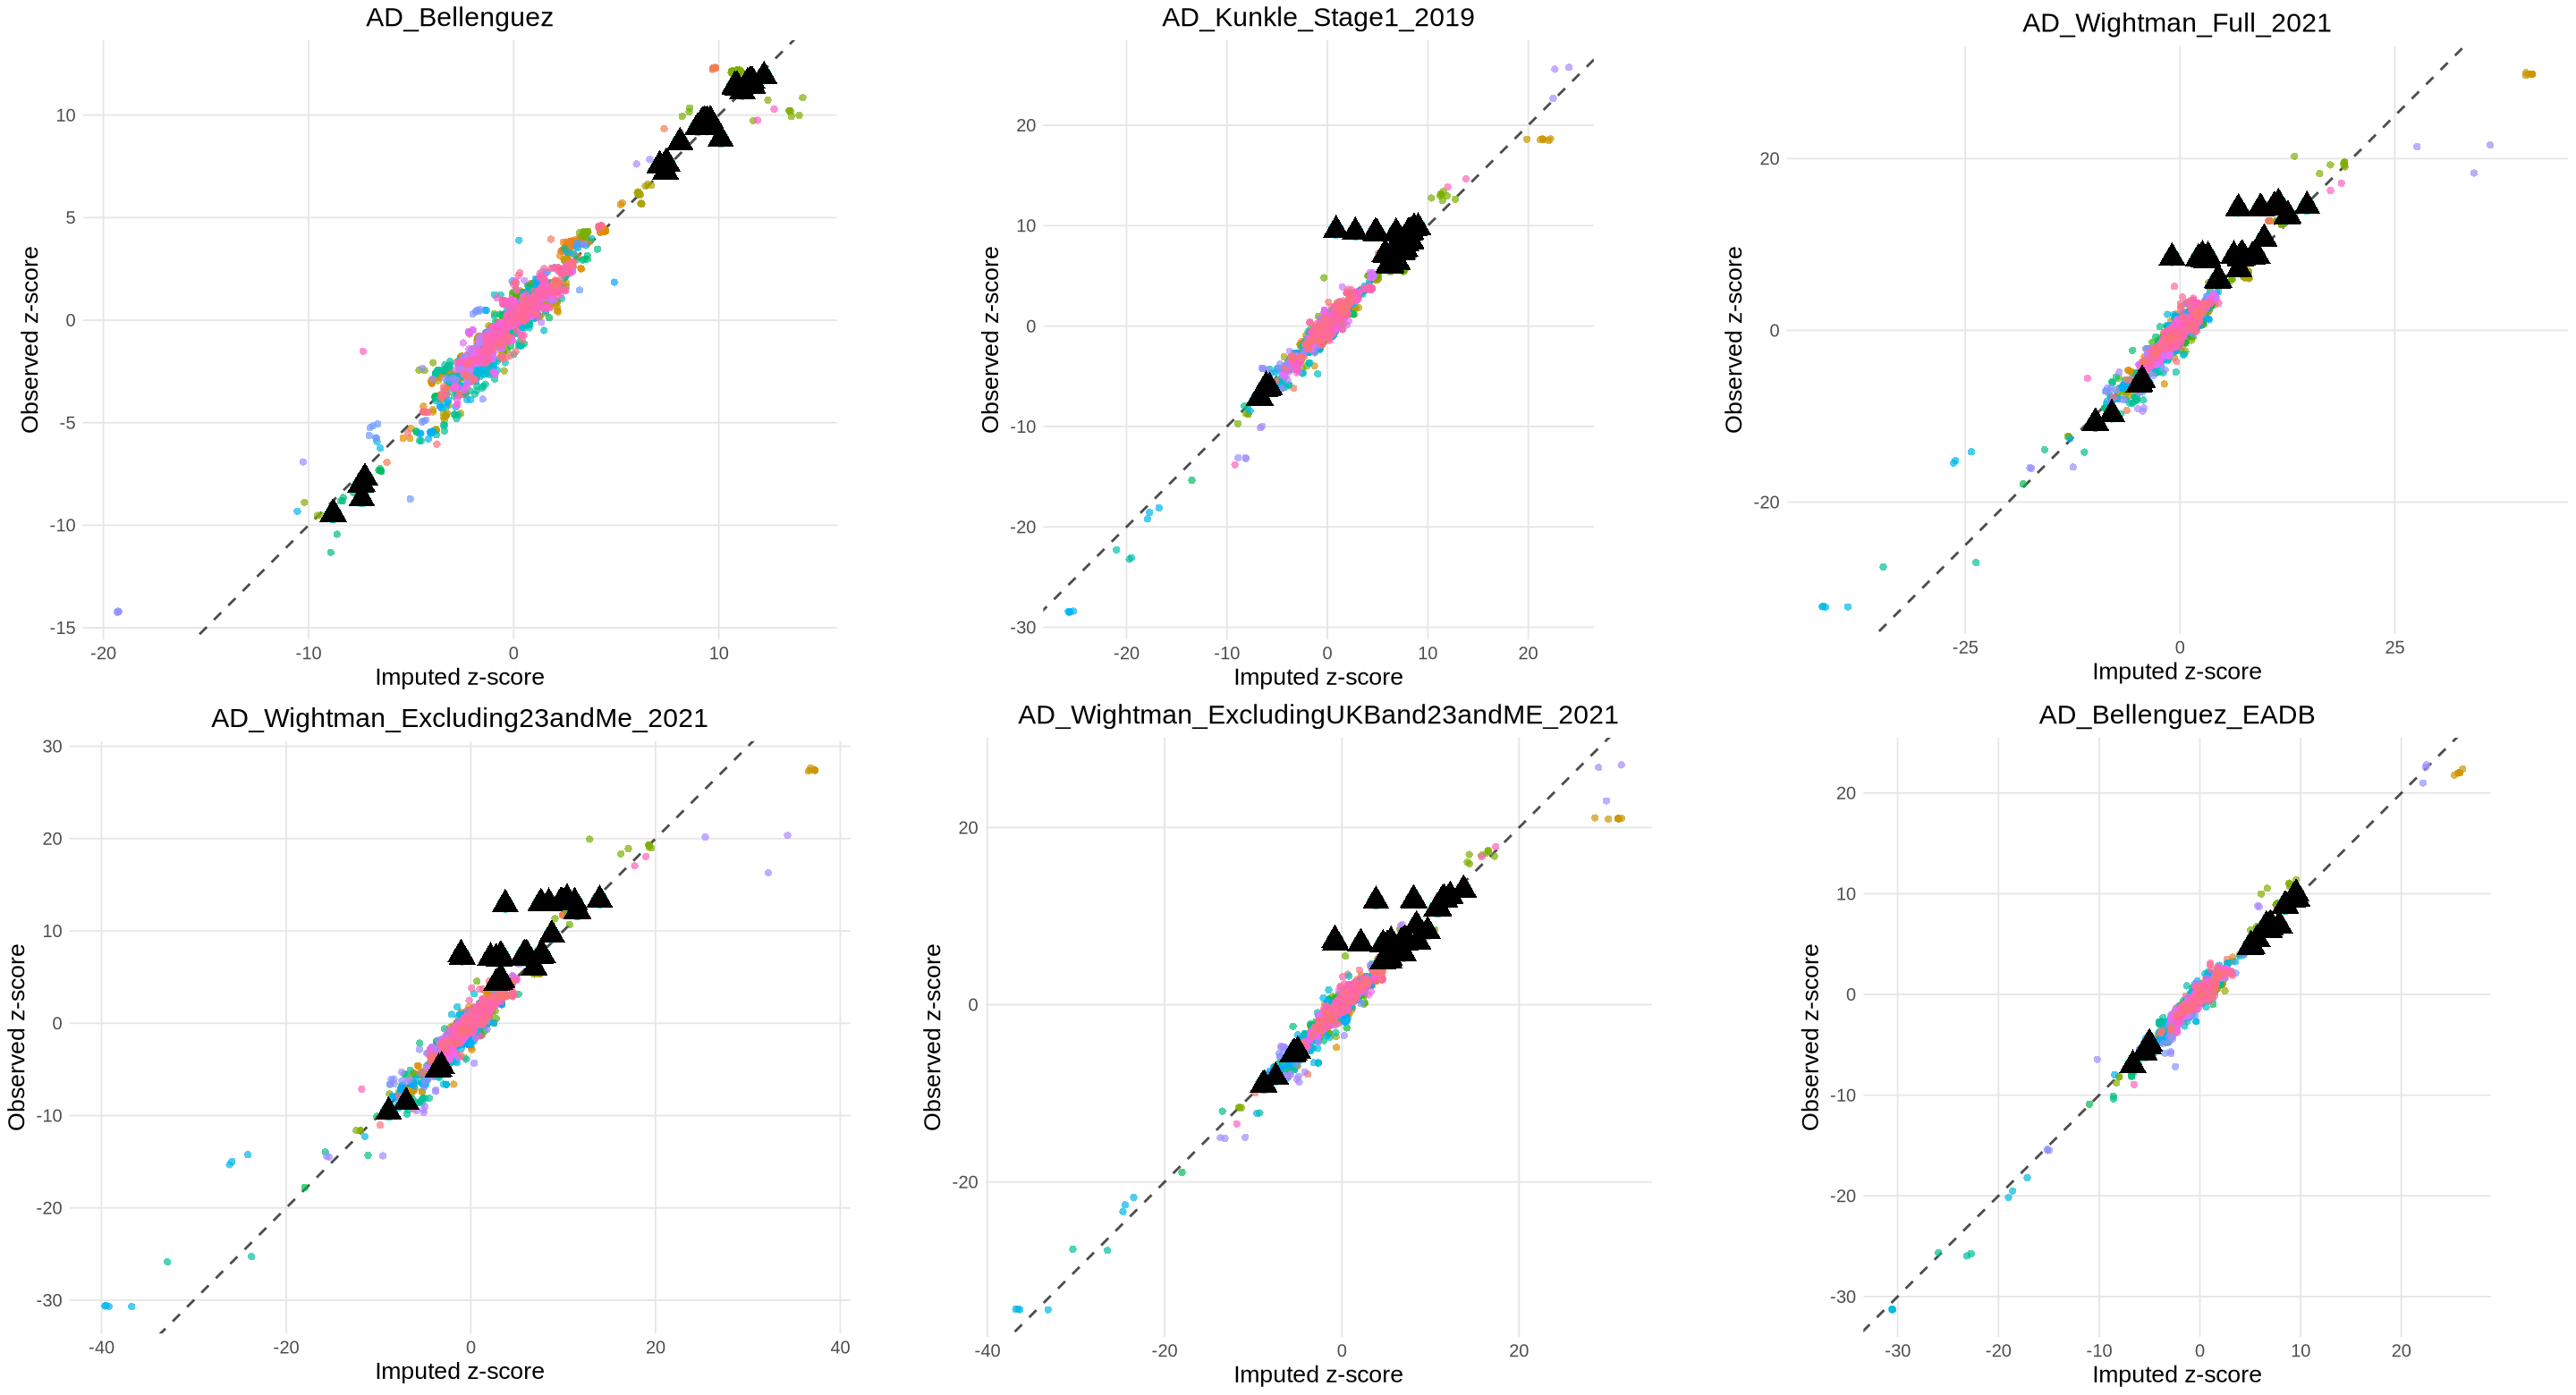

In [23]:
library(ggplot2)
library(gridExtra)
options(repr.plot.width = 24, repr.plot.height = 13)

# Create individual plots
plot_list <- list()
for(i in 1:length(raiss_summary)) {
  plot_data <- raiss_summary[[i]] %>%
    mutate(marked = ifelse(grepl("indcos_27.rds", cos_idx), TRUE, FALSE))
  
  plot_list[[i]] <- ggplot(plot_data, aes(x = z_observed, y = z_imputed)) +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", 
                color = "black", alpha = 0.7, linewidth = 0.8) +
    geom_point(aes(color = cos_idx, size = marked), shape = 16, alpha = 0.7) +
    geom_point(data = subset(plot_data, marked == TRUE), 
               aes(x = z_observed, y = z_imputed), 
               shape = 17, size = 5, stroke = 2, color = "black", fill = NA) +
    scale_size_manual(values = c("FALSE" = 2, "TRUE" = 5)) +
    labs(
      y = "Observed z-score",
      x = "Imputed z-score",
      color = "COS",
      title = names(raiss_summary)[i]
    ) +
    theme_minimal() +
    theme(
      legend.position = "none",
      text = element_text(size = 14),
      axis.title = element_text(size = 16),
      axis.text = element_text(size = 12),
      plot.title = element_text(size = 18, hjust = 0.5),
      panel.grid.minor = element_blank(),
      panel.grid.major = element_line(color = "grey90")
    ) +
    coord_equal()
}

# Arrange in 2 rows x 3 columns
grid.arrange(grobs = plot_list, nrow = 2, ncol = 3)

### 2.4 Distance based statistical test for the imputation results (simple two value test)

In [25]:
distance_analysis <- function(summary){
    summary %>%
      mutate(
        # Distance from y=x line
        distance_from_diagonal = abs(z_observed - z_imputed),
        # Perpendicular distance from y=x line
        perp_distance = abs(z_observed - z_imputed) / sqrt(2),
        p_value = pchisq(perp_distance^2, 1, lower.tail = FALSE)
      ) %>%
      group_by(cos_idx) %>%
      summarise(
        n_variants = n(),
        mean_observed_z = mean(abs(z_observed), na.rm = TRUE),
        mean_imputed_z = mean(abs(z_imputed), na.rm = TRUE),
        # mean_distance = mean(distance_from_diagonal, na.rm = TRUE),
        # median_distance = median(distance_from_diagonal, na.rm = TRUE),
        max_distance = ifelse(all(is.na(distance_from_diagonal)), NA, 
                              max(distance_from_diagonal, na.rm = TRUE)),
        #mean_perp_distance = mean(perp_distance, na.rm = TRUE),
        # median_perp_distance = median(perp_distance, na.rm = TRUE),
        max_perp_distance = ifelse(all(is.na(perp_distance)), NA, 
                                   max(perp_distance, na.rm = TRUE)),
        variants_ID = paste0(variant_id, collapse = "; "),
        min_pvalue = ifelse(all(is.na(p_value)), NA, 
                            min(p_value, na.rm = TRUE)),
        bh_adjusted = ifelse(all(is.na(p_value)), NA, 
                             min(p.adjust(p_value[!is.na(p_value)], method = "BH")))
      ) %>%
      arrange(bh_adjusted)
}
distance_summary <- lapply(raiss_summary, distance_analysis)

In [26]:
distance_summary[[1]] %>% head(n=5)

cos_idx,n_variants,mean_observed_z,mean_imputed_z,max_distance,max_perp_distance,variants_ID,min_pvalue,bh_adjusted
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
rss_qc_imputed_AD_Bellenguez_indcos_57.rds,1,7.3478261,1.513543,5.834283,4.125461,19:44840322:G:A,3.699932e-05,3.699932e-05
rss_qc_imputed_AD_Bellenguez_indcos_361.rds,3,19.2880622,14.217883,5.092335,3.600825,19:44893972:G:A; 19:44897490:T:A; 19:44899005:T:G,3.172094e-04,3.750548e-04
rss_qc_imputed_AD_Bellenguez_indcos_356.rds,1,5.0397554,8.722017,3.682262,2.603752,19:44711810:G:A,9.220940e-03,9.220940e-03
rss_qc_imputed_AD_Bellenguez_indcos_31.rds,1,0.2561728,3.898081,3.641908,2.575218,19:45179662:C:T,1.001769e-02,1.001769e-02
rss_qc_imputed_AD_Bellenguez_indcos_367.rds,1,10.2631579,6.913007,3.350151,2.368914,19:44927023:C:G,1.784038e-02,1.784038e-02


In [42]:
extract_potential <- lapply(distance_summary, function(summary){
    summary %>% filter(bh_adjusted < 0.05)
})
sapply(extract_potential, nrow) %>% as.data.frame

,.
,<int>
AD_Bellenguez,7
AD_Kunkle_Stage1_2019,9
AD_Wightman_Full_2021,18
AD_Wightman_Excluding23andMe_2021,16
AD_Wightman_ExcludingUKBand23andME_2021,14
AD_Bellenguez_EADB,6


In [45]:
# How to check the specific results
extract_potential[[1]] %>% 
    select(cos_idx, n_variants, mean_observed_z, mean_imputed_z, max_distance, min_pvalue, bh_adjusted) %>%
    head(n=2)

cos_idx,n_variants,mean_observed_z,mean_imputed_z,max_distance,min_pvalue,bh_adjusted
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
rss_qc_imputed_AD_Bellenguez_indcos_57.rds,1,7.347826,1.513543,5.834283,3.699932e-05,3.699932e-05
rss_qc_imputed_AD_Bellenguez_indcos_361.rds,3,19.288062,14.217883,5.092335,3.172094e-04,3.750548e-04


In [65]:
sig_sets <- lapply(extract_potential, function(ss){
    as.numeric(str_extract(ss$cos_idx, "(?<=indcos_)\\d+"))
})

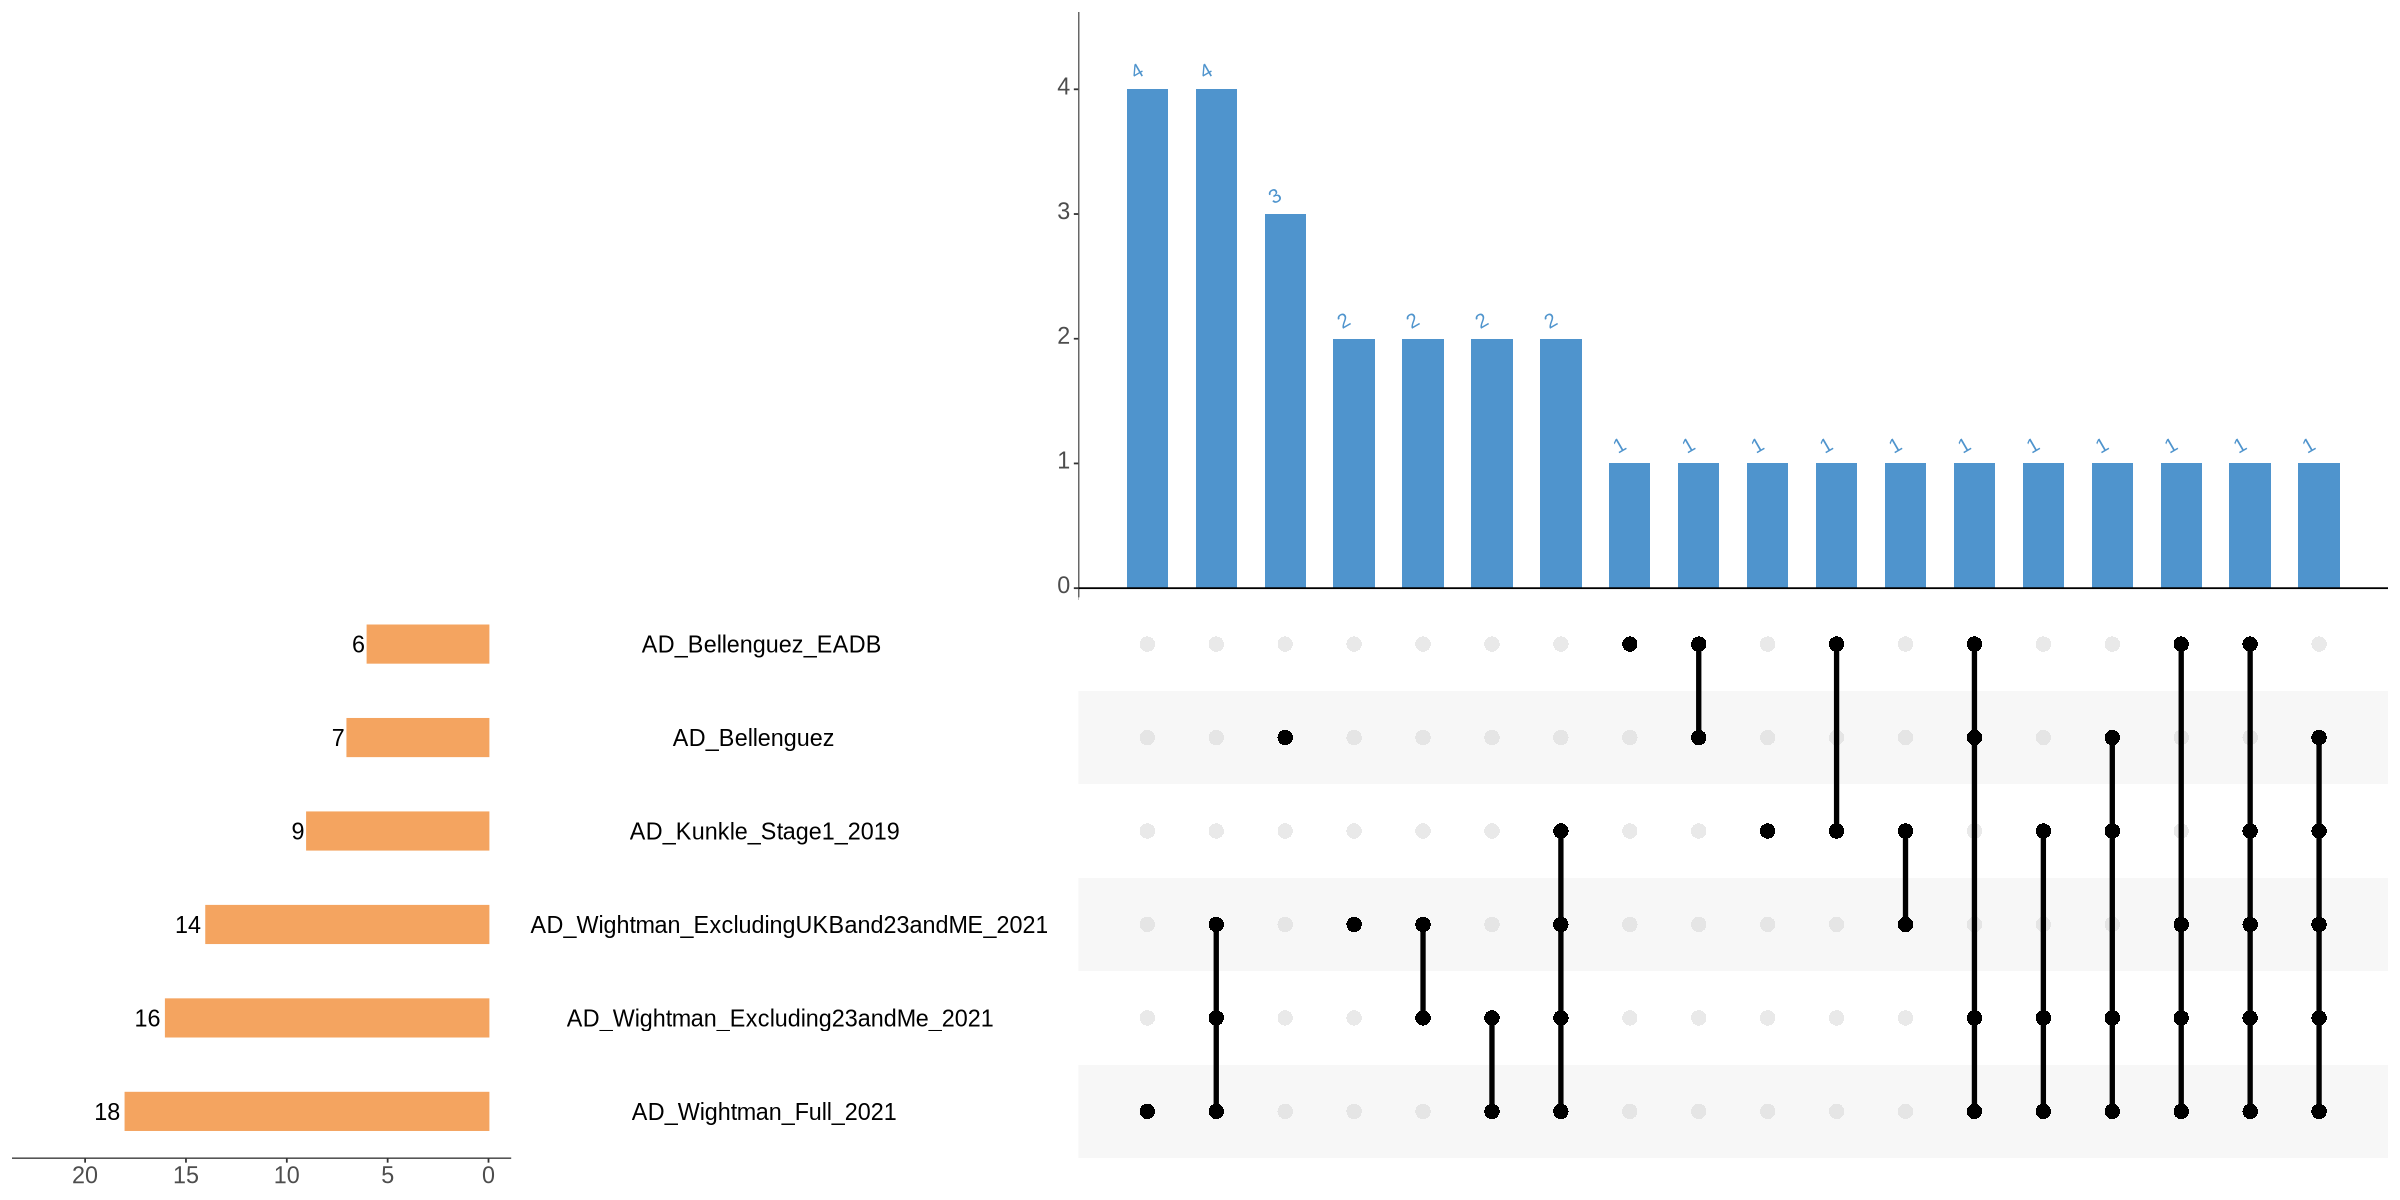

In [66]:
options(repr.plot.width = 20, repr.plot.height = 10)
library(UpSetR)
max_size <- max(sapply(sig_sets, length))
UpSetR::upset(fromList(sig_sets), 
            order.by = "freq", 
            keep.order = T,
            main.bar.color = "steelblue3", 
            sets.bar.color = "sandybrown", 
            text.scale = c(2,2,2,2,2), # Adjust font sizes for the main title, set names, set sizes, intersection sizes, and axis titles
            matrix.color = "black", # Adjust the color of matrix dots
            number.angles = 30, # Adjust the angle of number labels, useful for some plots
            mb.ratio = c(0.5, 0.5), # Adjust the ratio of main bar and sets bar
            point.size = 4, line.size = 1.5,
            nsets = length(sig_sets),
            set_size.show = TRUE,
            set_size.angles = 0,
            set_size.numbers_size = 7,
            set_size.scale_max = max_size + 0.25*max_size,
            nintersects = 100,
            mainbar.y.label = "",
            sets.x.label = NULL)

### 2.5 Removing independence sets only in sQTL

In [76]:
final_sets <- readRDS("xqtl_only_APOE_all_cohorts_merged_cos_cs_after_between_purity.rds")
final_outcomes <- final_sets$final_Outcome
shared_contexts <- lapply(sig_sets, function(ss) final_outcomes[ss] )

In [87]:
# check if sQTL only
sQTL_only <- lapply(shared_contexts, function(tes){
    sapply(tes, function(ss){
        contexts <- strsplit(ss, "; ")[[1]]
        sum(grepl("sQTL", contexts)) == length(contexts)
    }) %>% as.vector
})        

In [88]:
sig_sets_rmsQTL_only <- lapply(1:length(sig_sets), function(i){
    sig_sets[[i]][which(!sQTL_only[[i]])]
}) %>% setNames(names(sig_sets))
sig_sets_rmsQTL_only

$AD_Bellenguez
[1]  57  31 192

$AD_Kunkle_Stage1_2019
[1]  27  57 197  26 268 145 108

$AD_Wightman_Full_2021
 [1] 145 309  27  26 192  73  57 135 286 108 181 267

$AD_Wightman_Excluding23andMe_2021
 [1] 309 145  27  26 192 135  57  69 365 108

$AD_Wightman_ExcludingUKBand23andME_2021
[1] 145  27 135 108 197 365 220  69 103

$AD_Bellenguez_EADB
[1] 145 192

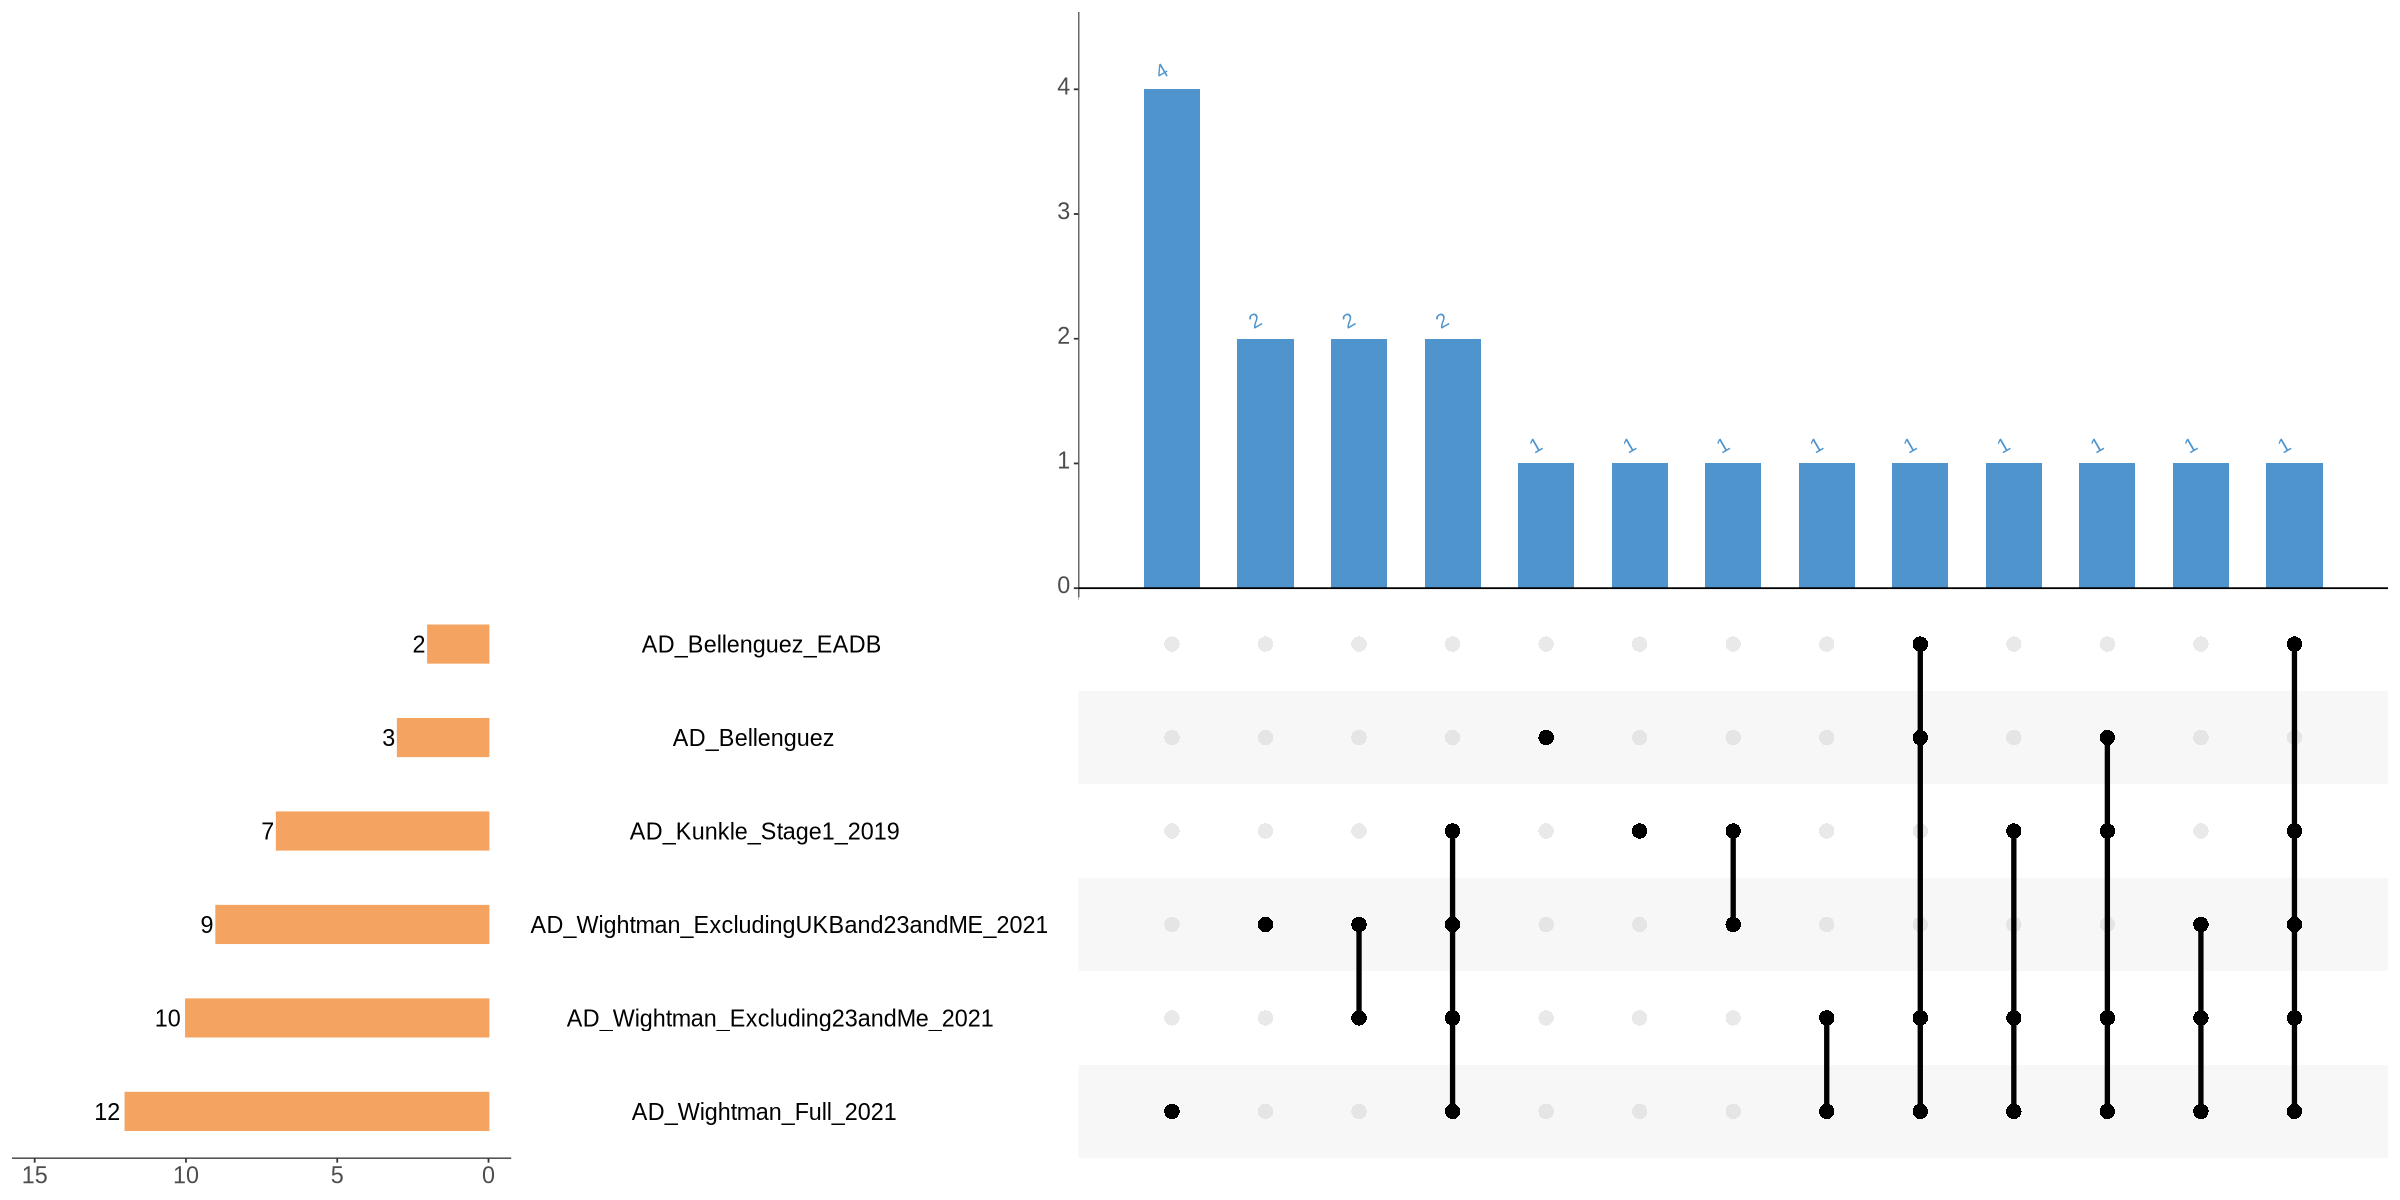

In [89]:
options(repr.plot.width = 20, repr.plot.height = 10)
library(UpSetR)
max_size <- max(sapply(sig_sets_rmsQTL_only, length))
UpSetR::upset(fromList(sig_sets_rmsQTL_only), 
            order.by = "freq", 
            keep.order = T,
            main.bar.color = "steelblue3", 
            sets.bar.color = "sandybrown", 
            text.scale = c(2,2,2,2,2), # Adjust font sizes for the main title, set names, set sizes, intersection sizes, and axis titles
            matrix.color = "black", # Adjust the color of matrix dots
            number.angles = 30, # Adjust the angle of number labels, useful for some plots
            mb.ratio = c(0.5, 0.5), # Adjust the ratio of main bar and sets bar
            point.size = 4, line.size = 1.5,
            nsets = length(sig_sets_rmsQTL_only),
            set_size.show = TRUE,
            set_size.angles = 0,
            set_size.numbers_size = 7,
            set_size.scale_max = max_size + 0.25*max_size,
            nintersects = 100,
            mainbar.y.label = "",
            sets.x.label = NULL)

### 2.6 Some interested sets

In [111]:
result_df <- tibble(
  indcos_num = unlist(sig_sets_rmsQTL_only),
  ad_gwas = rep(names(sig_sets_rmsQTL_only), lengths(sig_sets_rmsQTL_only))
) %>%
  group_by(indcos_num) %>%
  summarise(
    n_ad_gwas = n(),
    ad_gwas_list = paste0(ad_gwas, collapse = "; "),
    .groups = "drop"
  ) %>%
  arrange(desc(n_ad_gwas))
result_df %>% head

indcos_num,n_ad_gwas,ad_gwas_list
<dbl>,<int>,<chr>
145,5,AD_Kunkle_Stage1_2019; AD_Wightman_Full_2021; AD_Wightman_Excluding23andMe_2021; AD_Wightman_ExcludingUKBand23andME_2021; AD_Bellenguez_EADB
27,4,AD_Kunkle_Stage1_2019; AD_Wightman_Full_2021; AD_Wightman_Excluding23andMe_2021; AD_Wightman_ExcludingUKBand23andME_2021
57,4,AD_Bellenguez; AD_Kunkle_Stage1_2019; AD_Wightman_Full_2021; AD_Wightman_Excluding23andMe_2021
108,4,AD_Kunkle_Stage1_2019; AD_Wightman_Full_2021; AD_Wightman_Excluding23andMe_2021; AD_Wightman_ExcludingUKBand23andME_2021
192,4,AD_Bellenguez; AD_Wightman_Full_2021; AD_Wightman_Excluding23andMe_2021; AD_Bellenguez_EADB
26,3,AD_Kunkle_Stage1_2019; AD_Wightman_Full_2021; AD_Wightman_Excluding23andMe_2021
135,3,AD_Wightman_Full_2021; AD_Wightman_Excluding23andMe_2021; AD_Wightman_ExcludingUKBand23andME_2021
69,2,AD_Wightman_Excluding23andMe_2021; AD_Wightman_ExcludingUKBand23andME_2021
197,2,AD_Kunkle_Stage1_2019; AD_Wightman_ExcludingUKBand23andME_2021


In [103]:
### this is glycoQTL only. Given the covariates issues here, we don't know if we can duplicate this.
idx <- 145
final_outcomes[[idx]]
final_sets$final_set[[idx]]

[1] "DLPFC_Klein_gpQTL_unadjusted_gp_0860_O96005_ENSG00000104853"

[1] "chr19:44883377:C:T"       "chr19:44885307:CTTTTTT:C"
 [3] "chr19:44885313:T:*"       "chr19:44885317:T:C"      
 [5] "chr19:44893716:G:A"       "chr19:44894050:C:T"      
 [7] "chr19:44894695:T:C"       "chr19:44895528:C:T"      
 [9] "chr19:44896087:G:T"       "chr19:44896639:G:A"      
[11] "chr19:44897227:T:TG"      "chr19:44897468:C:T"      
[13] "chr19:44916829:A:C"       "chr19:44917947:C:T"      
[15] "chr19:44918393:G:A"       "chr19:44921082:G:GTT"    
[17] "chr19:44921094:A:T"       "chr19:44921809:G:A"

Warning message:
“Removed 40 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 39 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 56 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 53 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 56 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 40 rows containing missing values or values outside the scale range
(`geom_point()`).”


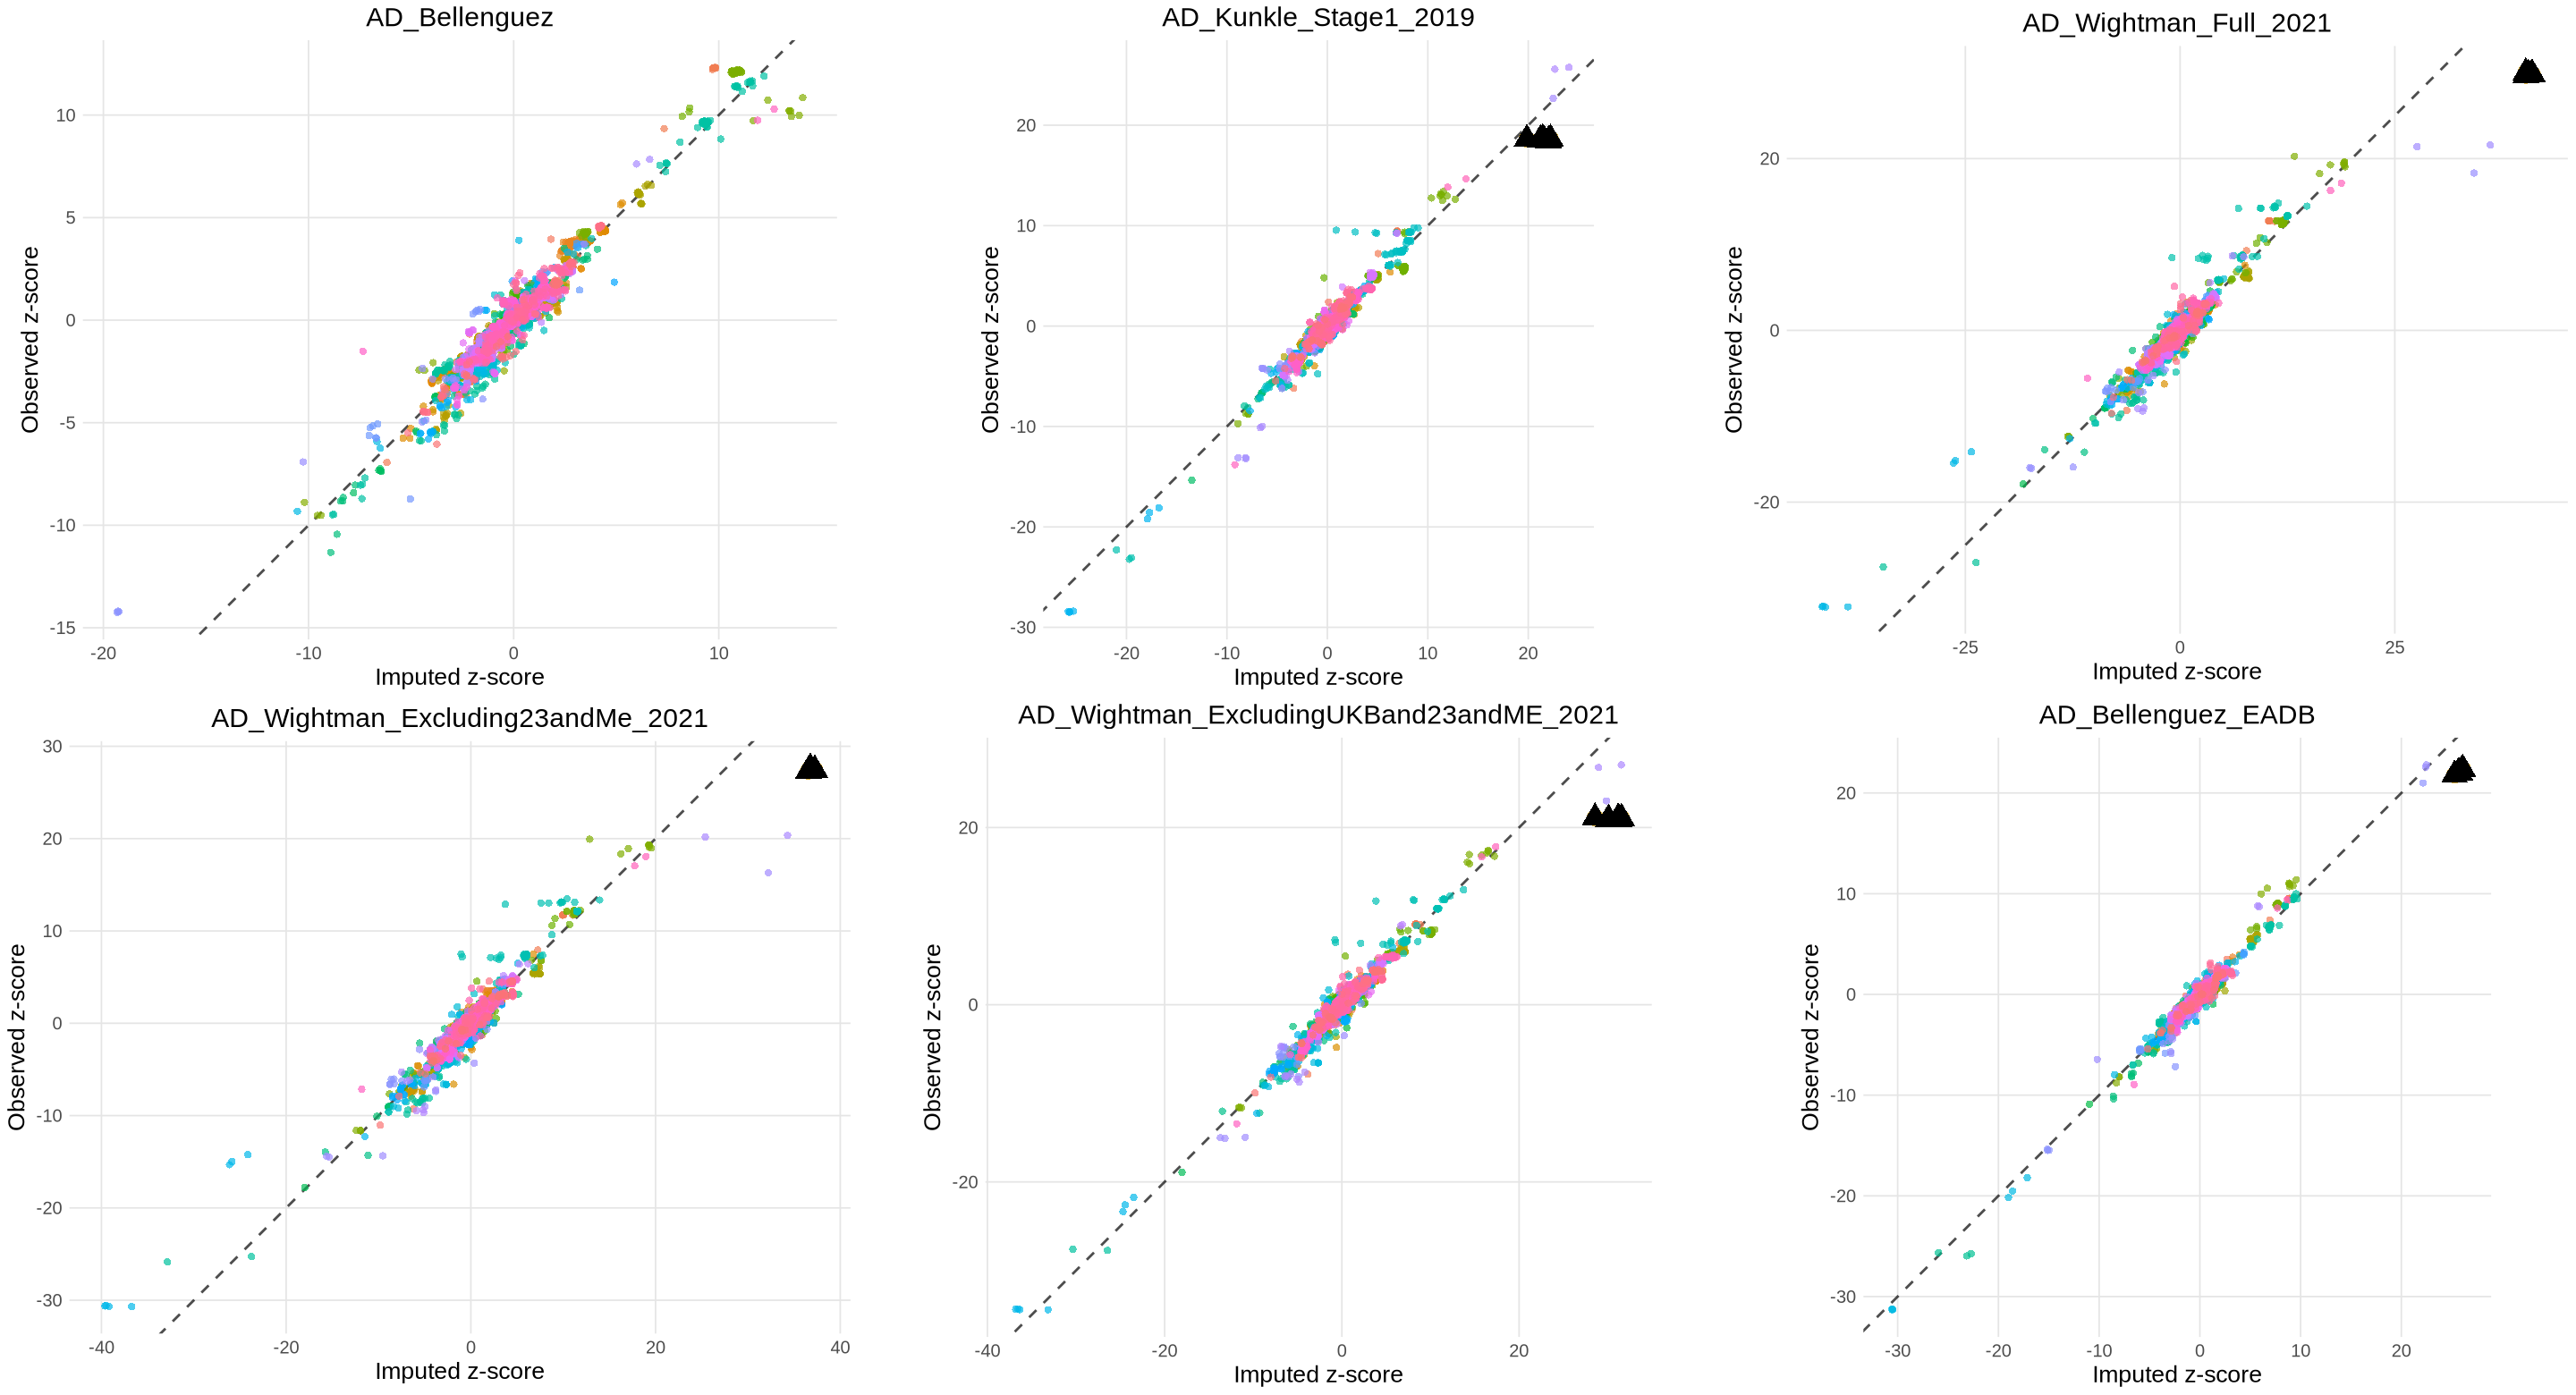

In [98]:
library(ggplot2)
library(gridExtra)
options(repr.plot.width = 24, repr.plot.height = 13)

# Create individual plots
plot_list <- list()
for(i in 1:length(raiss_summary)) {
  plot_data <- raiss_summary[[i]] %>%
    mutate(marked = ifelse(grepl(paste0("indcos_", idx, ".rds"), cos_idx), TRUE, FALSE))
  
  plot_list[[i]] <- ggplot(plot_data, aes(x = z_observed, y = z_imputed)) +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", 
                color = "black", alpha = 0.7, linewidth = 0.8) +
    geom_point(aes(color = cos_idx, size = marked), shape = 16, alpha = 0.7) +
    geom_point(data = subset(plot_data, marked == TRUE), 
               aes(x = z_observed, y = z_imputed), 
               shape = 17, size = 5, stroke = 2, color = "black", fill = NA) +
    scale_size_manual(values = c("FALSE" = 2, "TRUE" = 5)) +
    labs(
      y = "Observed z-score",
      x = "Imputed z-score",
      color = "COS",
      title = names(raiss_summary)[i]
    ) +
    theme_minimal() +
    theme(
      legend.position = "none",
      text = element_text(size = 14),
      axis.title = element_text(size = 16),
      axis.text = element_text(size = 12),
      plot.title = element_text(size = 18, hjust = 0.5),
      panel.grid.minor = element_blank(),
      panel.grid.major = element_line(color = "grey90")
    ) +
    coord_equal()
}

# Arrange in 2 rows x 3 columns
grid.arrange(grobs = plot_list, nrow = 2, ncol = 3)

In [109]:
idx <- 26
final_outcomes[[idx]]
final_sets$final_set[[idx]]

[1] "AC_DeJager_eQTL_ENSG00000130208; Metabrain_Cortex_chr19_41840000_47960000_ENSG00000130208; STARNET_eQTL_Mac_ENSG00000130208; ROSMAP_AC_ENSG00000130208; ROSMAP_DLPFC_ENSG00000130208"

[1] "chr19:44918487:G:T"  "chr19:44918715:AG:A" "chr19:44920379:G:A" 
[4] "chr19:44925202:C:T"  "chr19:44913034:C:T"

Warning message:
“Removed 40 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 39 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 56 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 53 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 56 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 40 rows containing missing values or values outside the scale range
(`geom_point()`).”


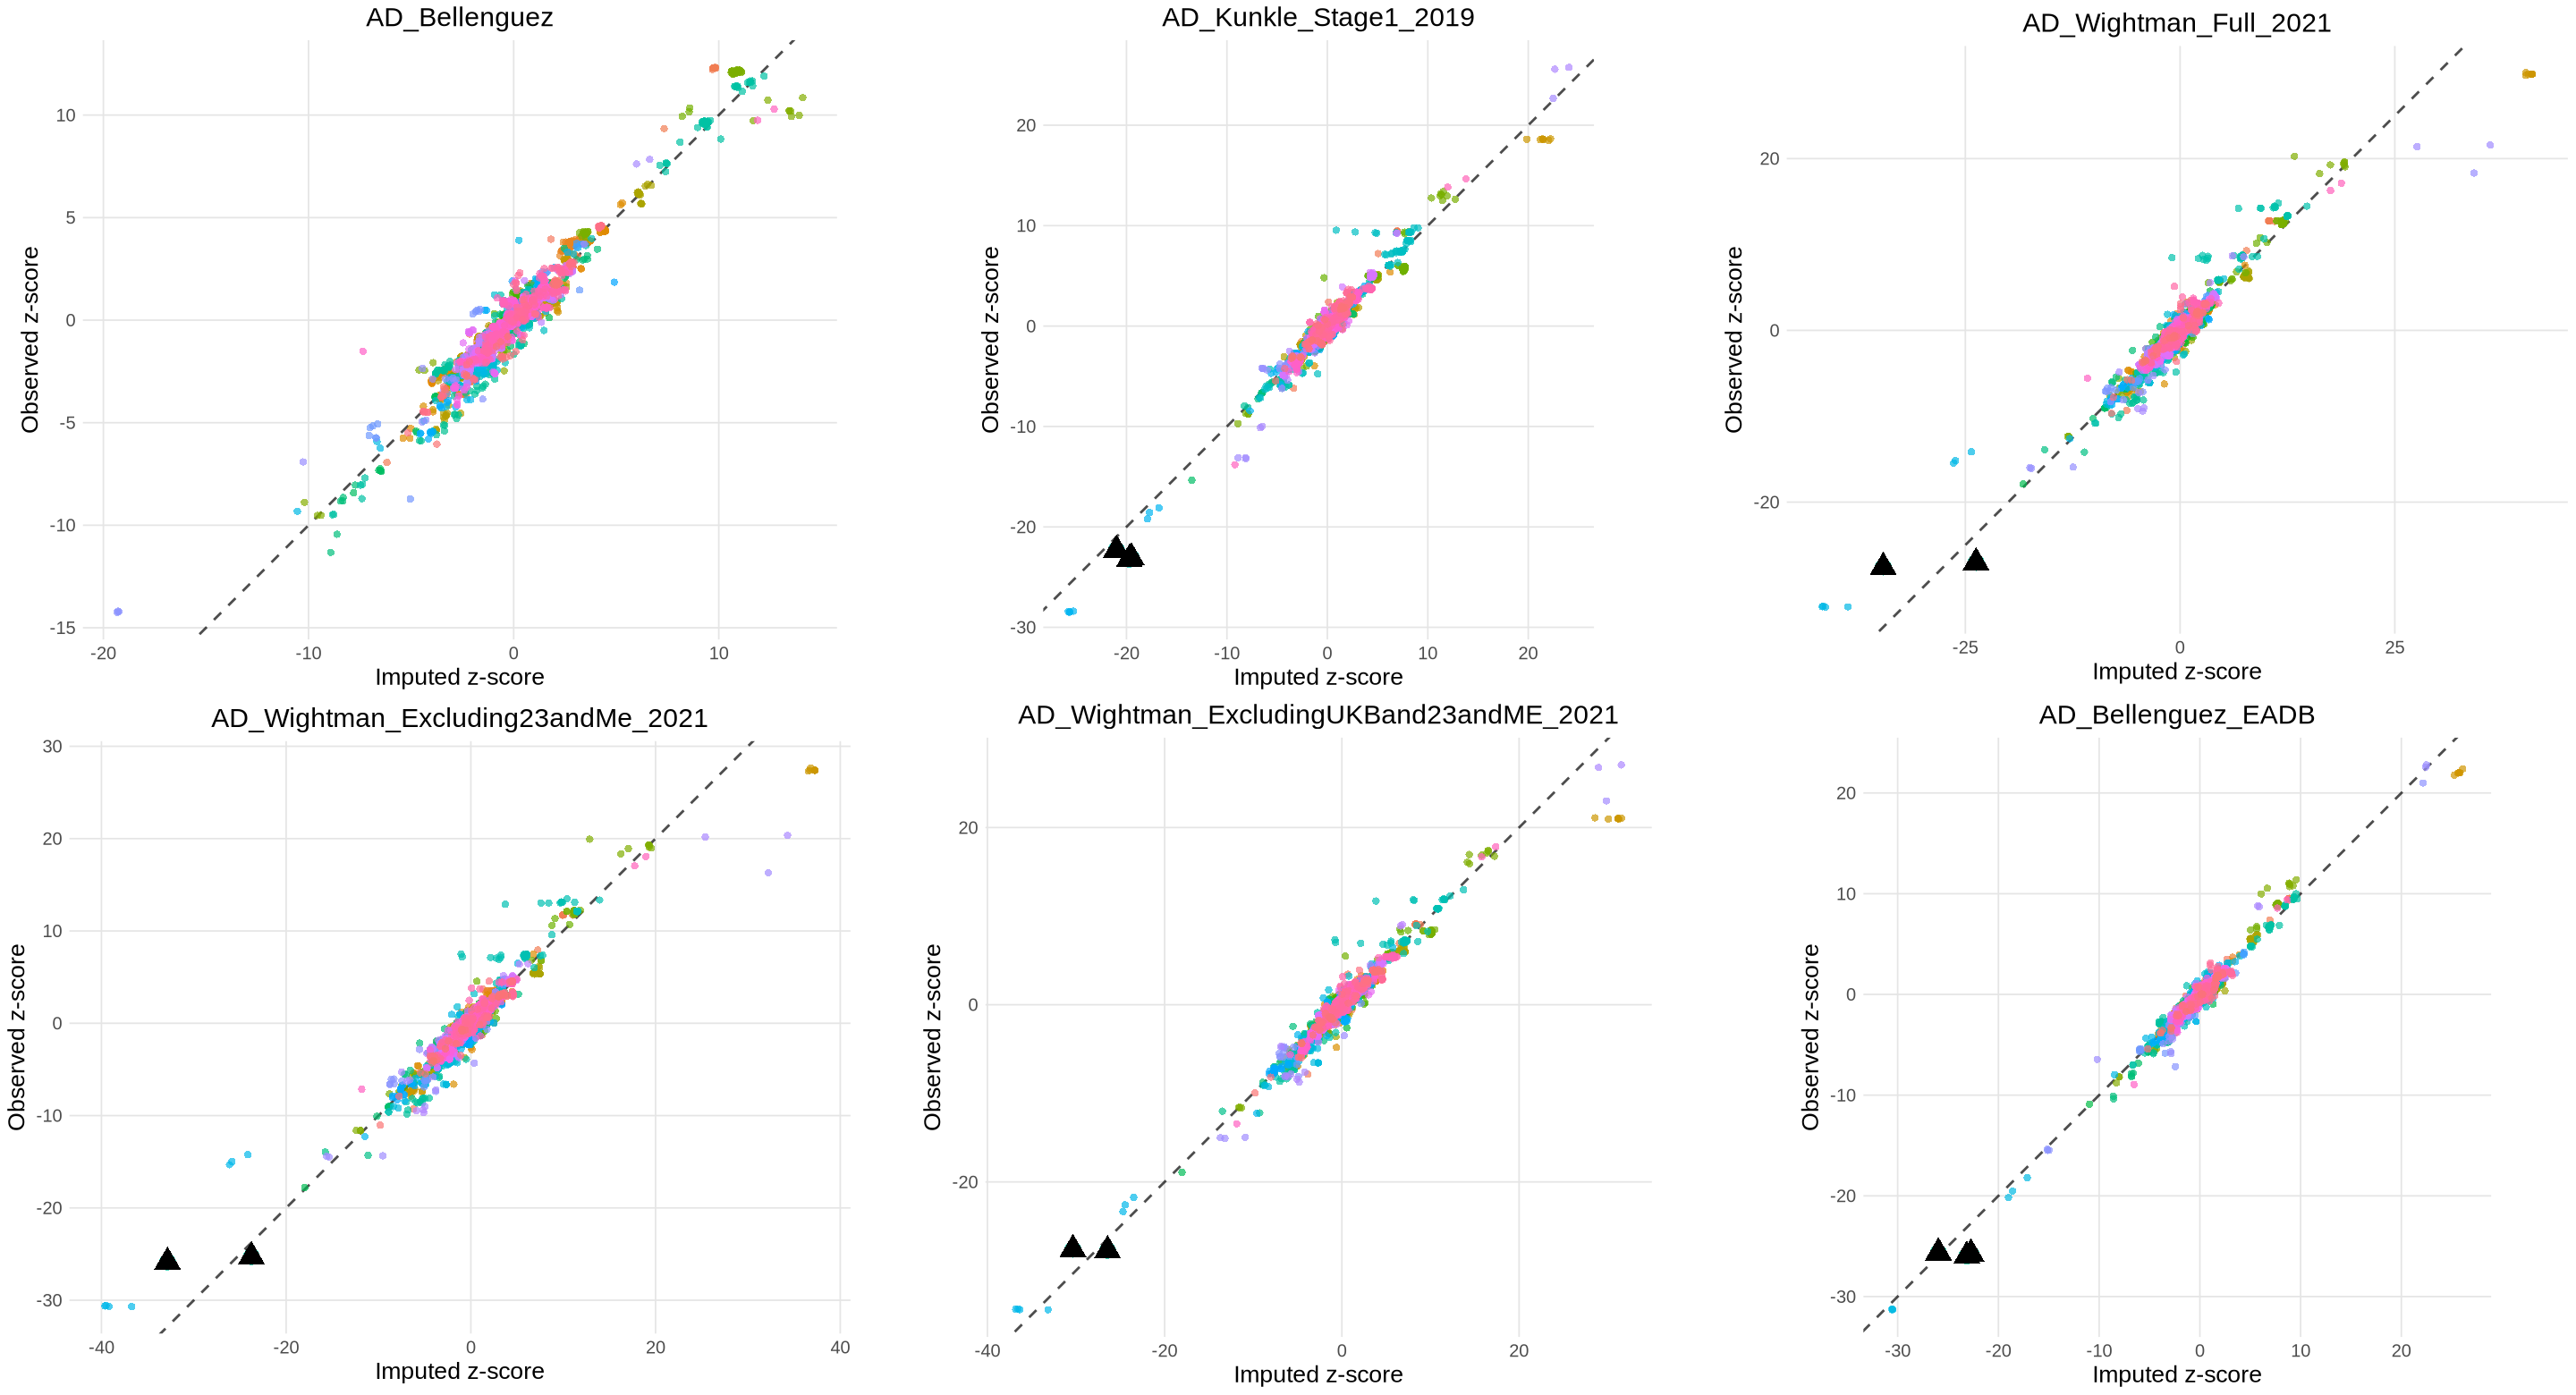

In [110]:
library(ggplot2)
library(gridExtra)
options(repr.plot.width = 24, repr.plot.height = 13)

# Create individual plots
plot_list <- list()
for(i in 1:length(raiss_summary)) {
  plot_data <- raiss_summary[[i]] %>%
    mutate(marked = ifelse(grepl(paste0("indcos_", idx, ".rds"), cos_idx), TRUE, FALSE))
  
  plot_list[[i]] <- ggplot(plot_data, aes(x = z_observed, y = z_imputed)) +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", 
                color = "black", alpha = 0.7, linewidth = 0.8) +
    geom_point(aes(color = cos_idx, size = marked), shape = 16, alpha = 0.7) +
    geom_point(data = subset(plot_data, marked == TRUE), 
               aes(x = z_observed, y = z_imputed), 
               shape = 17, size = 5, stroke = 2, color = "black", fill = NA) +
    scale_size_manual(values = c("FALSE" = 2, "TRUE" = 5)) +
    labs(
      y = "Observed z-score",
      x = "Imputed z-score",
      color = "COS",
      title = names(raiss_summary)[i]
    ) +
    theme_minimal() +
    theme(
      legend.position = "none",
      text = element_text(size = 14),
      axis.title = element_text(size = 16),
      axis.text = element_text(size = 12),
      plot.title = element_text(size = 18, hjust = 0.5),
      panel.grid.minor = element_blank(),
      panel.grid.major = element_line(color = "grey90")
    ) +
    coord_equal()
}

# Arrange in 2 rows x 3 columns
grid.arrange(grobs = plot_list, nrow = 2, ncol = 3)

In [118]:
all_ensg <- str_extract_all(unlist(final_outcomes[result_df$indcos_num]), "ENSG\\d+") %>% unlist %>% unique
all_ensg

[1] "ENSG00000104853" "ENSG00000224916" "ENSG00000234906" "ENSG00000130208"
 [5] "ENSG00000130203" "ENSG00000267467" "ENSG00000160007" "ENSG00000183668"
 [9] "ENSG00000187244" "ENSG00000104783" "ENSG00000176472" "ENSG00000130755"
[13] "ENSG00000170684" "ENSG00000130204" "ENSG00000189114" "ENSG00000167380"
[17] "ENSG00000234465" "ENSG00000230510" "ENSG00000105321" "ENSG00000130202"

In [120]:
gene_info <- data.table::fread("Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.region_list")
gene_info %>% dim
gene_info %>% head

[1] 60726     5

#chr,start,end,gene_id,gene_name
<chr>,<int>,<int>,<chr>,<chr>
chr1,11868,11869,ENSG00000223972,DDX11L1
chr1,17435,17436,ENSG00000278267,MIR6859-1
chr1,29553,29554,ENSG00000243485,MIR1302-2HG
chr1,29569,29570,ENSG00000227232,WASH7P
chr1,30365,30366,ENSG00000284332,MIR1302-2
chr1,36080,36081,ENSG00000237613,FAM138A


In [123]:
gene_info %>% filter(gene_id %in% all_ensg) %>% pull(gene_name)

[1] "GMFG"        "PSG9"        "ZNF575"      "PINLYP"      "KCNN4"      
 [6] "ZNF226"      "BCAM"        "NECTIN2"     "TOMM40"      "APOE"       
[11] "APOC1"       "APOC4"       "APOC4-APOC2" "APOC2"       "CLPTM1"     
[16] "ZNF296"      "BLOC1S3"     "PPP5D1"      "ARHGAP35"    "CCDC9"